<a href="https://colab.research.google.com/github/PrimeshShamilka/fabric_defect_detector/blob/master/FabricDetectorModel6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
 09_Spectrum_2019.pdf
 1331.eps
'170160E_170425X_Final AB.gdoc'
'170160E_170425X_Formatting a Paper.gdoc'
'170425X_170098U_Critical Reading .gdoc'
 170425X_Lab5.gdoc
 31.pdf
 ACM
'ASTRA 2019'
'Automation challege 1'
'Automation challenge 2 - Smart helmet'
'Automation challenge 3'
'Automation challenge 3.gslides'
'Book report.gdoc'
'Bridge design pattern.gdoc'
'B.Sc Eng. Academic Calendar - 2019-1_0.pdf'
'B.Sc Eng. Academic Calendar - 2019.pdf'
'Chamika Ishan Sudusinghe.docx'
'Chamika Ishan Sudusinghe.gdoc'
 CNN.rar
 CODES
'Colab Notebooks'
 CS2242-Design-Patterns-Sample-Question.pdf
'CSE Decrypt 2.0'
'CSE sem 2'
'CSE sem 3'
'CSE sem 4'
'CSE sem 5'
 cv
 darknet
'DENUWAN LIYANAGE (1).gdoc'
'DENUWAN LIYANAGE.docx'
'DENUWAN LIYANAGE.gdoc'
'Design and implement a firewall.gdoc'
'Digital Image Processing.gdoc'
'Documentation  of rosbridge websocket  &  rosmqtt bridge.gdoc'
 English.pdf
'Entrepreneurship society'


In [0]:
ls /mydrive/darknet/

classes.names      obj.data  train.txt                   yolov3-spp_model4.cfg
darknet53.conv.74  obj.zip   valid.txt                   yolov3-spp_model5.cfg
obj/               test.txt  yolov3_custom_best.weights


In [0]:
!cp /mydrive/darknet/obj.zip ../

In [0]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
replace data/obj/valid/stain/dye_spot3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/obj/valid/stain/dye_spot3.jpg  
  inflating: data/obj/valid/stain/dye_spot3.txt  
  inflating: data/obj/valid/stain/stain2.jpg  
  inflating: data/obj/valid/stain/stain2.txt  
  inflating: data/obj/valid/stain/c1r3e2n16.jpg  
  inflating: data/obj/valid/stain/c1r3e2n16.txt  
  inflating: data/obj/valid/stain/c1r1e2n4.jpg  
  inflating: data/obj/valid/stain/c1r1e2n4.txt  
  inflating: data/obj/valid/stain/c1r1e2n5.jpg  
  inflating: data/obj/valid/stain/c1r1e2n5.txt  
  inflating: data/obj/valid/stain/c1r1e2n25.jpg  
  inflating: data/obj/valid/stain/c1r1e2n25.txt  
  inflating: data/obj/valid/stain/c1r3e2n47.jpg  
  inflating: data/obj/valid/stain/c1r3e2n47.txt  
  inflating: data/obj/valid/stain/c1r3e2n48.jpg  
  inflating: data/obj/valid/stain/c1r3e2n48.txt  
  inflating: data/obj/valid/stain/c2r2e2n5.jpg  
  inflating: data/obj/valid/stain/c2r2e2n5.txt  
  infla

In [0]:
!ls

darknet  data  gdrive  sample_data


In [0]:
!cp -r data/obj darknet/data

In [0]:
!cp /mydrive/darknet/yolov3-spp_model5.cfg /content/darknet/cfg

In [0]:
!cp /mydrive/darknet/darknet53.conv.74 darknet/

In [0]:
!cp /mydrive/darknet/obj.data darknet/data

In [0]:
!cp /mydrive/darknet/classes.names darknet/data

In [0]:
!cp /mydrive/darknet/train.txt darknet/data

In [0]:
!cp /mydrive/darknet/test.txt darknet/data

In [0]:
!cp /mydrive/darknet/valid.txt darknet/data

In [0]:
%cd /content/darknet

/content/darknet


javascript:void(setInterval(function(){ console.log("Connect pushed"); document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click(); },60000)) 

In [0]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model5.cfg darknet53.conv.74 -dont_show -map


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 101 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000004, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 113 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.32 %, best = 80.45 % 
 3951: 0.058897, 0.069419 avg loss, 0.000010 rate, 2.878134 seconds, 252864 images, 0.088853 hours left
Loaded: 0.000039 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 89 Avg (IOU: 0.600200, GIOU: 0.560026), Class: 0.999863, Obj: 0.494602, No Obj: 0.002526, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.644904, iou_l

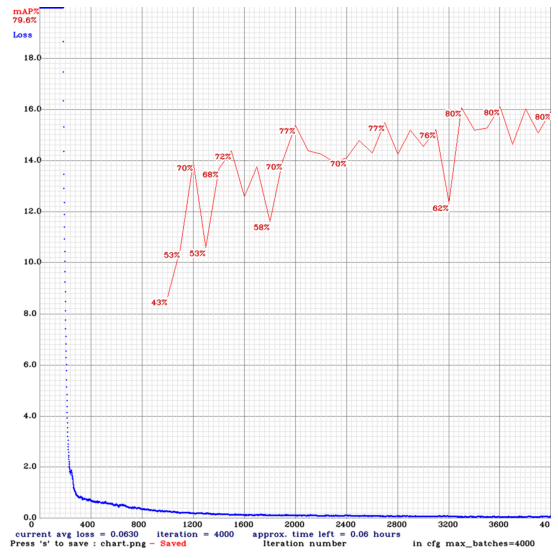

In [0]:
imShow('chart.png')

# VALIDATION SET RESULTS 
 
 calculation mAP (mean average precision)...
36
 detections_count = 45, unique_truth_count = 20  
class_id = 0, name = stain, ap = 89.50%   	 (TP = 19, FP = 1) 

 for conf_thresh = 0.25, precision = 0.95, recall = 0.95, F1-score = 0.95  

 for conf_thresh = 0.25, TP = 19, FP = 1, FN = 1, average IoU = 69.58 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.895000, or 89.50 % 
 
Total Detection Time: 12 Seconds


# TEST SET RESULTS

 calculation mAP (mean average precision)...
36
 detections_count = 50, unique_truth_count = 19  
class_id = 0, name = stain, ap = 60.20%   	 (TP = 12, FP = 2) 

 for conf_thresh = 0.25, precision = 0.86, recall = 0.63, F1-score = 0.73 

 for conf_thresh = 0.25, TP = 12, FP = 2, FN = 7, average IoU = 64.46 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.601951, or 60.20 % 

Total Detection Time: 13 Seconds

In [0]:
!cp /mydrive/darknet/yolov3-spp_model5.cfg /content/darknet/cfg

In [27]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model5.cfg backup/yolov3-spp_model5_last.weights -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.604 BF
   8 Shor

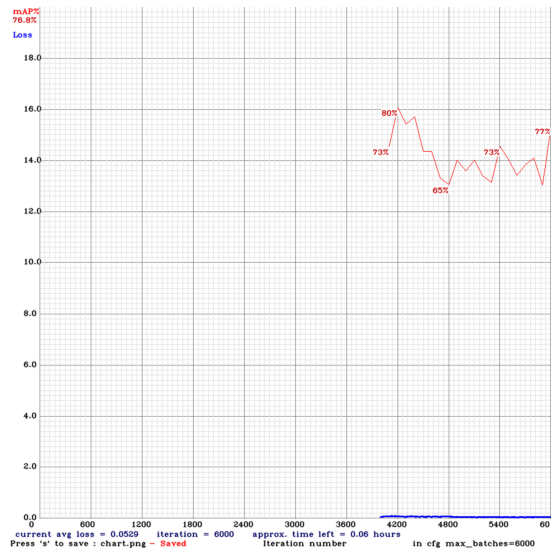

In [29]:
imShow('chart.png')